In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

# __Preprocessing__

In [2]:
def create_data(n=25) -> pd.DataFrame:
    x1 = np.random.randint(0, 50, n) # losowa liczba od 0 do 50 | study_hours
    x2 = np.random.randint(2, 12, n) # losowa liczba od 2 do 12 | sleep_hours
    x3 = np.random.uniform(0, 5, n) # rozkład jednostajny od 0 do 5 | coffee_liters
    
    points = (x1 * 2 + x2 * 3) + np.random.normal(0, 20, n)
    points = ((points - np.min(points)) / (np.max(points) - np.min(points)) * 100).astype(int)
    
    grades = np.array([2 if p<50 else 
                   3 if p<65 else
                   4 if p<85 else 5 
                   for p in points])
    
    data = [x1, x2, x3, points, grades]
    df = pd.DataFrame(data).transpose()
    df.rename(columns=({i: f"x{i+1}" if i<=2 
                        else "points" if i==3 
                        else "grades" 
                        for i in range(len(data))}), inplace=True)
    return df

In [3]:
df = create_data()
df

,x1,x2,x3,points,grades
0,46.0,5.0,0.126373,45.0,2.0
1,0.0,6.0,3.422802,1.0,2.0
2,44.0,3.0,3.976857,89.0,5.0
3,10.0,5.0,1.449541,9.0,2.0
4,29.0,4.0,3.037764,35.0,2.0
5,43.0,3.0,2.081395,96.0,5.0
6,49.0,5.0,0.814161,89.0,5.0
7,42.0,5.0,0.583193,96.0,5.0
8,27.0,7.0,3.862518,50.0,3.0
9,40.0,7.0,4.838779,54.0,3.0


In [4]:
df_column_mapper = {
    "x1": "study_hours",
    "x2": "sleep_hours",
    "x3": "coffe_liters"
}

# __Plots__

In [5]:
def make_scatters(df) -> None:
    plt.figure(figsize=(10, 10))
    
    plt.subplot(3, 2, 1)
    plt.scatter(df["x1"], df["points"], color='blue')
    plt.xlabel(df_column_mapper["x1"])
    plt.ylabel("points")

    plt.subplot(3, 2, 2)
    plt.scatter(df["x1"], df["grades"], color='green')
    plt.xlabel(df_column_mapper["x1"])
    plt.ylabel("grades")

    plt.subplot(3, 2, 3)
    plt.scatter(df["x2"], df["points"], color='blue')
    plt.xlabel(df_column_mapper["x2"])
    plt.ylabel("points")
    plt.xticks(range(0, int(max(df["x2"]))+1))

    plt.subplot(3, 2, 4)
    plt.scatter(df["x2"], df["grades"], color='green')
    plt.xlabel(df_column_mapper["x2"])
    plt.ylabel("grades")
    plt.xticks(range(0, int(max(df["x2"]))+1))

    plt.subplot(3, 2, 5)
    plt.scatter(df["x3"], df["points"], color='blue')
    plt.xlabel(df_column_mapper["x3"])
    plt.ylabel("points")

    plt.subplot(3, 2, 6)
    plt.scatter(df["x3"], df["grades"], color='green')
    plt.xlabel(df_column_mapper["x3"])
    plt.ylabel("grades")
    
    plt.show()

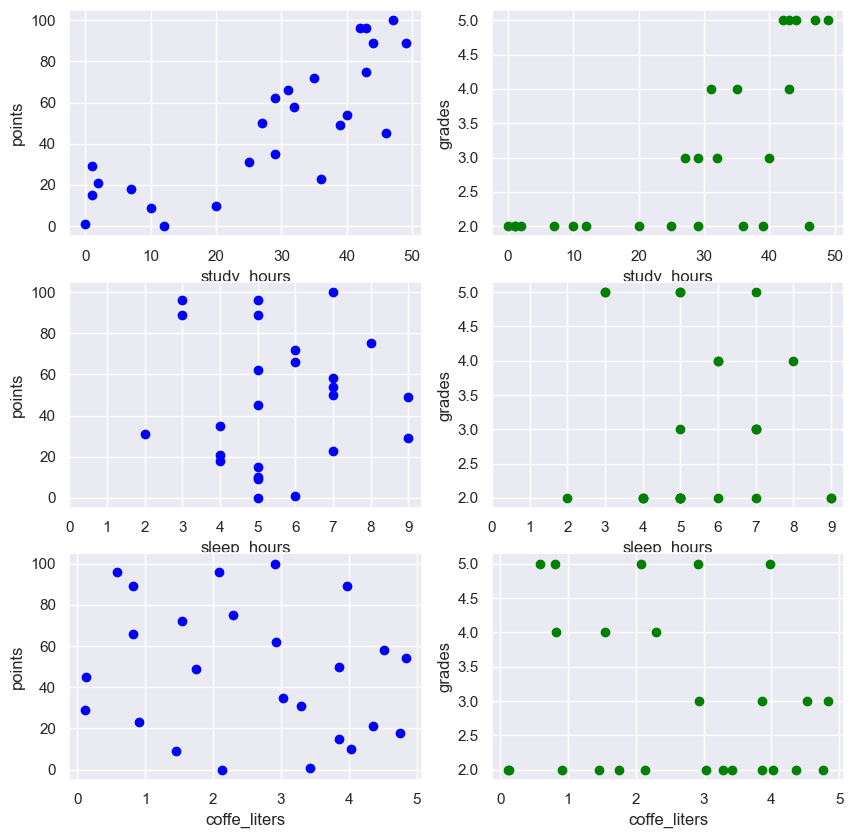

In [6]:
make_scatters(df=df)

# __Regression__

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from typing import List

In [8]:
models = []

In [9]:
def print_separators() -> None:
    print("-"*50)
    

def make_regression(indep_var: List[str],
                    dep_var: str,
                    df: pd.DataFrame,
                    train_size: float = .8) -> None:

    regression_dims = len(indep_var)
    
    model_name = f"Linear Reggresion (n={df[dep_var].shape[0]}, {len(indep_var)}D=[{[var for var in indep_var]} vs {dep_var}], train_size={train_size})"
    print(model_name)
    
    #  splitting data on train and test sets
    X = np.array(df[indep_var]).reshape(-1, 1) if regression_dims==1 else np.array(df[indep_var])
    y = np.array(df[dep_var]).reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=2023)

    #  fitting linear regression model
    reg_model = LinearRegression().fit(X=X_train, y=y_train)
    
    #  saving model for later predictions
    models.append((model_name, reg_model))
    
    #  printing model formula
    coefs = reg_model.coef_[0]
    intercept = reg_model.intercept_[0]
    is_intercept_positive = intercept>=0
    symbols = ['-',  '+']
    print_separators()
    polynomial = ' + '.join([f"{round(coefs[i], 3)}*x{i+1}" for i in range(len(coefs))])
    print(f"Reggresion Model: \ny = {polynomial} {symbols[int(is_intercept_positive)]} {abs(round(intercept, 3))}")
    
    #  displaying y_pred vs y_test
    y_pred = reg_model.predict(X_test)
    print_separators()
    y_comparsion = pd.concat([pd.Series(y_pred.flatten()), pd.Series(y_test.flatten())], axis=1)
    y_comparsion.rename(columns={0:"y_pred", 1:"y_test"}, inplace=True)
    display(y_comparsion)
    
    #  R2 score
    R2_score = reg_model.score(X_test, y_test)
    print_separators()
    print(f"R^2 coefficient: {R2_score}")
    
    #  other errors
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    print_separators()
    print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}")
    
    #  plotting 1D regression
    if regression_dims==1:
        line_1d = lambda x: x*coefs[0] + intercept
        indep_var_name = indep_var[0]

        plt.figure(figsize=(10, 6))
        plt.scatter(df[indep_var], df[dep_var])  # data
        plt.plot(df[indep_var], df[indep_var].apply(line_1d), "red")  # regression line
        plt.xlabel(df_column_mapper[indep_var_name])
        plt.ylabel(dep_var)
        plt.xticks(range(0, int(max(df[indep_var_name]))+5, 5))
        plt.title(f"Linear Regression plot \n {df_column_mapper[indep_var_name]} vs {dep_var} \n y={round(coefs[0], 2)}x + {round(intercept, 2)}")
        plt.show()
        
        plt.figure(figsize=(10, 6))
        sns.regplot(x=df[indep_var], y=df[dep_var], line_kws={"color":"red"})  # pre-build function
        plt.xlabel(df_column_mapper[indep_var_name])
        plt.ylabel(dep_var)
        plt.xticks(range(0, int(max(df[indep_var_name]))+5, 5))
        plt.title(f"Linear Regression plot with confidence interval \n {df_column_mapper[indep_var_name]} vs {dep_var} \n Created with seaborn.regplox() plot")
        plt.show()

## 1D

Linear Reggresion (n=25, 1D=[['x1'] vs points], train_size=0.8)
--------------------------------------------------
Reggresion Model: 
y = 1.663*x1 + 3.196
--------------------------------------------------


,y_pred,y_test
0,69.702464,54.0
1,56.401222,58.0
2,51.413257,35.0
3,44.762636,31.0
4,4.858912,15.0


--------------------------------------------------
R^2 coefficient: 0.3467851486172906
--------------------------------------------------
Mean Squared Error: 162.1540547072438
Mean Absolute Error: 11.523644427617166


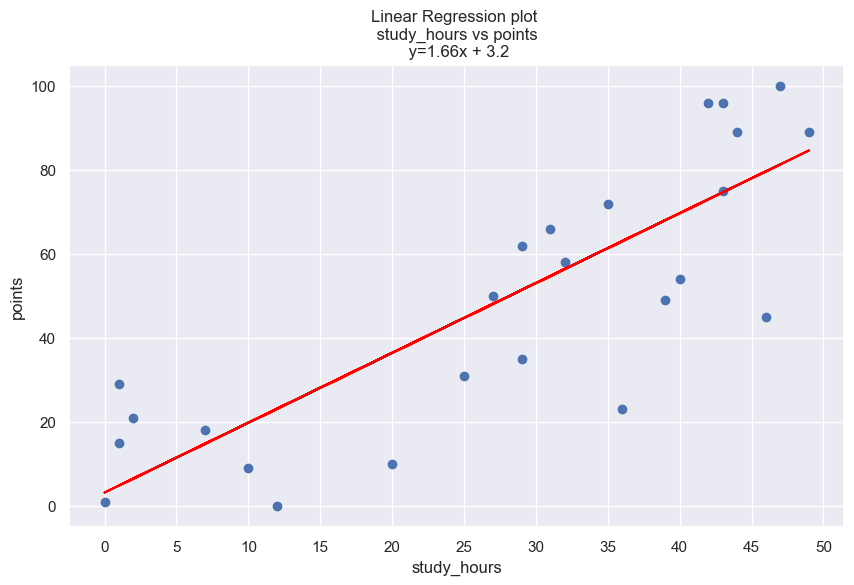

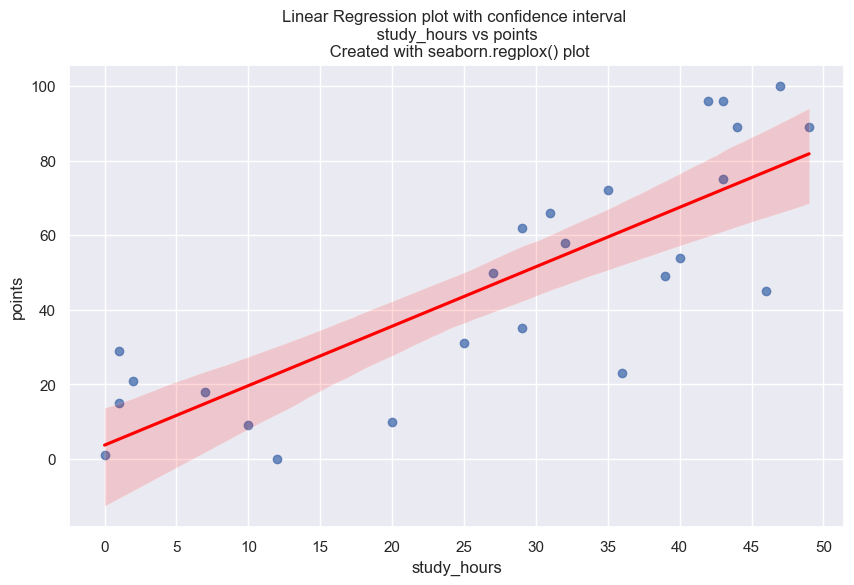

In [10]:
make_regression(indep_var=["x1"],
                dep_var="points",
                df=df,
                train_size=.8)

## 2D

In [11]:
make_regression(indep_var=["x1", "x2"],
                dep_var="points",
                df=df,
                train_size=.8)

Linear Reggresion (n=25, 2D=[['x1', 'x2'] vs points], train_size=0.8)
--------------------------------------------------
Reggresion Model: 
y = 1.662*x1 + -1.486*x2 + 11.682
--------------------------------------------------


,y_pred,y_test
0,67.764080,54.0
1,54.467340,58.0
2,53.938870,35.0
3,50.262372,31.0
4,5.914342,15.0


--------------------------------------------------
R^2 coefficient: 0.18288871014399366
--------------------------------------------------
Mean Squared Error: 202.83970659385503
Mean Absolute Error: 12.916728053518685


## 3D

In [12]:
make_regression(indep_var=["x1", "x2", "x3"],
                dep_var="points",
                df=df,
                train_size=.8)

Linear Reggresion (n=25, 3D=[['x1', 'x2', 'x3'] vs points], train_size=0.8)
--------------------------------------------------
Reggresion Model: 
y = 1.693*x1 + -1.159*x2 + 1.068*x3 + 6.549
--------------------------------------------------


,y_pred,y_test
0,71.327085,54.0
1,57.438986,58.0
2,54.256728,35.0
3,50.071263,31.0
4,6.566606,15.0


--------------------------------------------------
R^2 coefficient: 0.10876619435173318
--------------------------------------------------
Mean Squared Error: 221.23987991412577
Mean Absolute Error: 12.929896702358983


# __1000 samples__

In [13]:
df2 = create_data(n=1000)

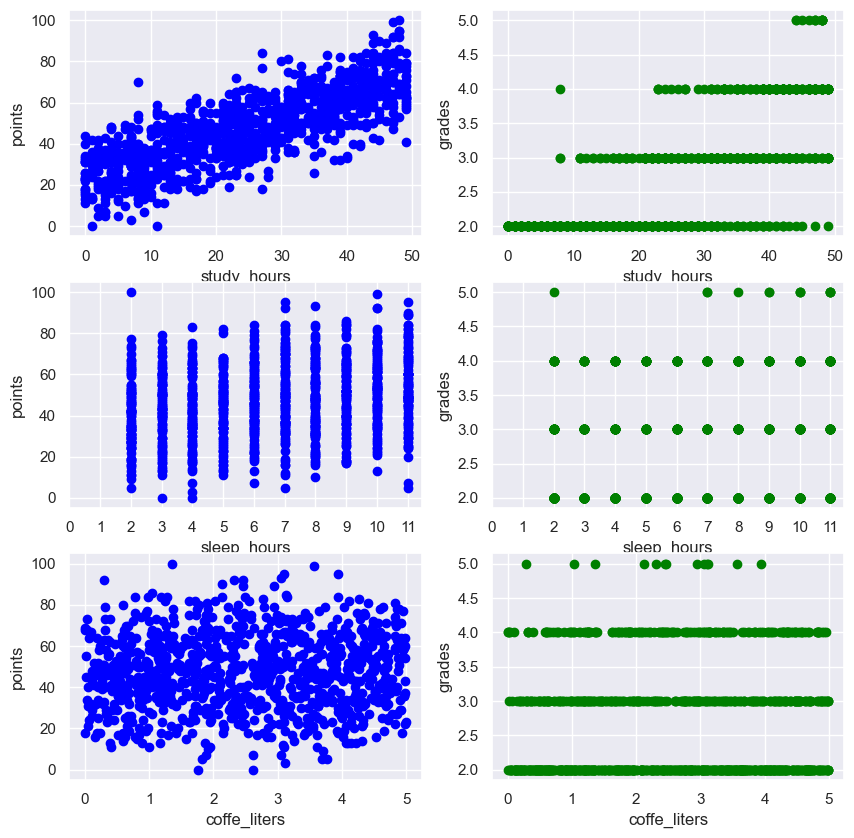

In [14]:
make_scatters(df=df2)

## 1D

Linear Reggresion (n=1000, 1D=[['x1'] vs points], train_size=0.8)
--------------------------------------------------
Reggresion Model: 
y = 1.003*x1 + 22.339
--------------------------------------------------


,y_pred,y_test
0,38.381985,53.0
1,32.365998,46.0
2,33.368662,56.0
3,58.435276,73.0
4,60.440605,67.0
...,...,...
195,66.456592,50.0
196,22.339352,32.0
197,43.395308,36.0
198,46.403301,51.0


--------------------------------------------------
R^2 coefficient: 0.6347708877266542
--------------------------------------------------
Mean Squared Error: 118.61980501945054
Mean Absolute Error: 8.867677784668452


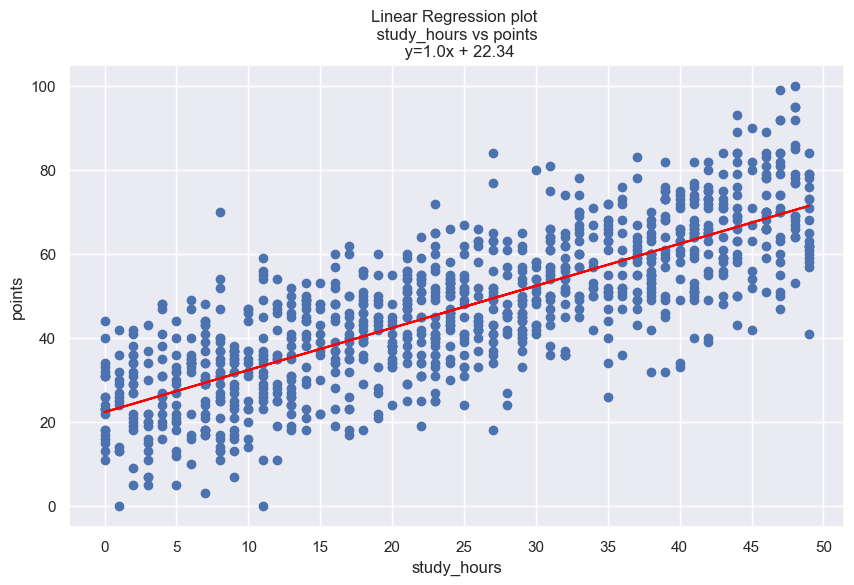

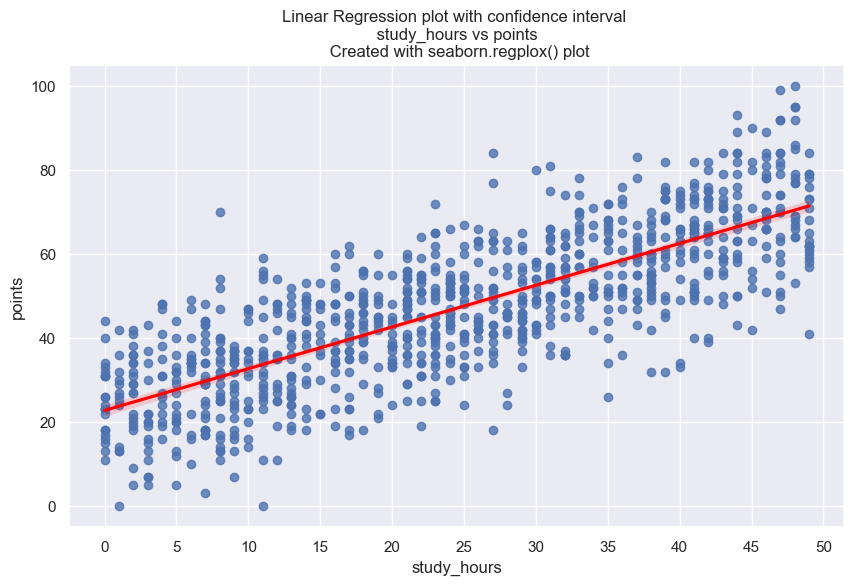

In [15]:
make_regression(indep_var=["x1"],
                dep_var="points",
                df=df2,
                train_size=.8)

## 2D

In [16]:
make_regression(indep_var=["x1", "x2"],
                dep_var="points",
                df=df2,
                train_size=.8)

Linear Reggresion (n=1000, 2D=[['x1', 'x2'] vs points], train_size=0.8)
--------------------------------------------------
Reggresion Model: 
y = 0.998*x1 + 1.47*x2 + 12.912
--------------------------------------------------


,y_pred,y_test
0,43.573174,53.0
1,37.586366,46.0
2,28.296821,56.0
3,57.650720,73.0
4,61.115943,67.0
...,...,...
195,65.633131,50.0
196,18.790626,32.0
197,47.092561,36.0
198,41.268239,51.0


--------------------------------------------------
R^2 coefficient: 0.7046998714765507
--------------------------------------------------
Mean Squared Error: 95.90813681209005
Mean Absolute Error: 7.900185892633833


## 3D

In [17]:
make_regression(indep_var=["x1", "x2", "x3"],
                dep_var="points",
                df=df2,
                train_size=.8)

Linear Reggresion (n=1000, 3D=[['x1', 'x2', 'x3'] vs points], train_size=0.8)
--------------------------------------------------
Reggresion Model: 
y = 0.997*x1 + 1.47*x2 + 0.246*x3 + 12.308
--------------------------------------------------


,y_pred,y_test
0,43.155363,53.0
1,37.009094,46.0
2,28.667109,56.0
3,57.493212,73.0
4,61.292521,67.0
...,...,...
195,66.154741,50.0
196,18.532347,32.0
197,47.086075,36.0
198,41.760977,51.0


--------------------------------------------------
R^2 coefficient: 0.7030554558708213
--------------------------------------------------
Mean Squared Error: 96.44221323690851
Mean Absolute Error: 7.932073448029869


# __Other train_test_split fractions__

## __train_size=.9__

## 1D

Linear Reggresion (n=25, 1D=[['x1'] vs points], train_size=0.9)
--------------------------------------------------
Reggresion Model: 
y = 1.625*x1 + 4.046
--------------------------------------------------


,y_pred,y_test
0,69.036491,54.0
1,56.038476,58.0
2,51.164220,35.0


--------------------------------------------------
R^2 coefficient: -0.6265749969960974
--------------------------------------------------
Mean Squared Error: 163.74188303094047
Mean Absolute Error: 11.054078420252866


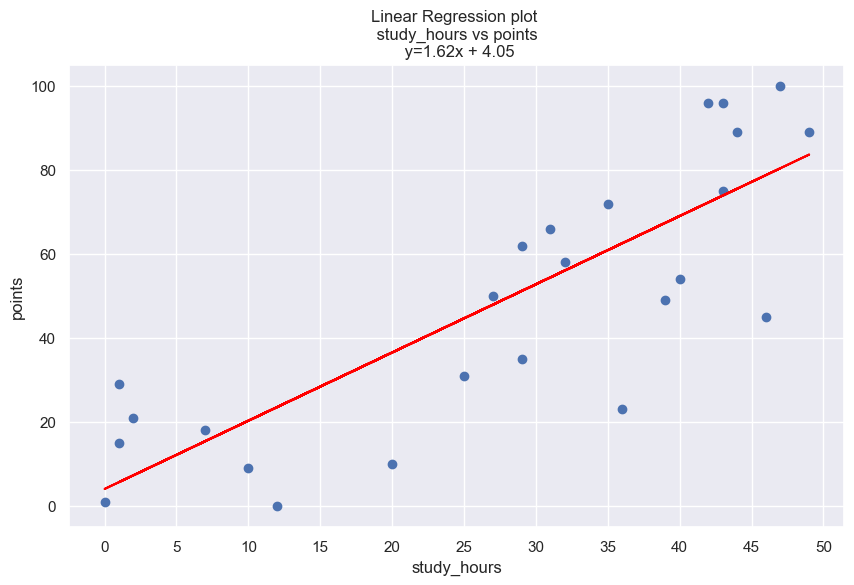

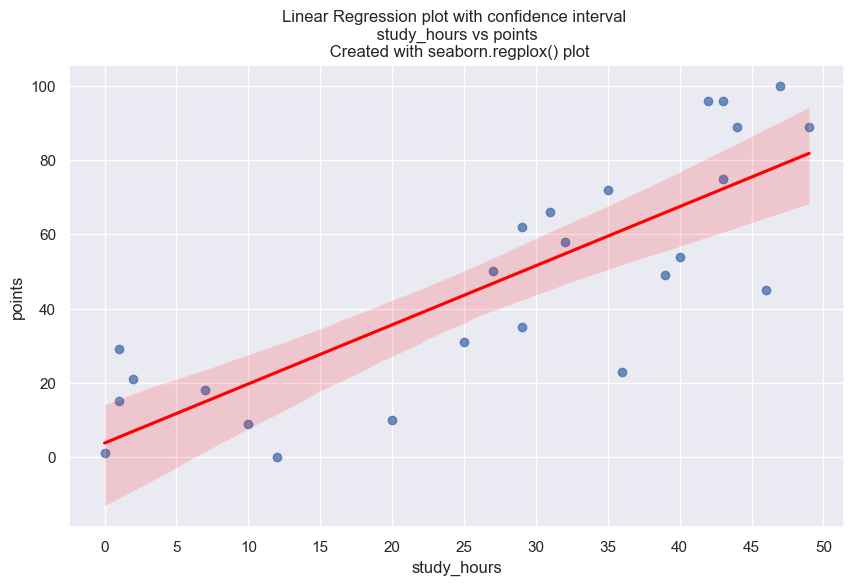

In [18]:
make_regression(indep_var=["x1"],
                dep_var="points",
                df=df,
                train_size=.9)

## 2D

In [19]:
make_regression(indep_var=["x1", "x2"],
                dep_var="points",
                df=df,
                train_size=.9)

Linear Reggresion (n=25, 2D=[['x1', 'x2'] vs points], train_size=0.9)
--------------------------------------------------
Reggresion Model: 
y = 1.627*x1 + -0.57*x2 + 7.126
--------------------------------------------------


,y_pred,y_test
0,68.208875,54.0
1,55.194453,58.0
2,52.023530,35.0


--------------------------------------------------
R^2 coefficient: -0.6541847283164273
--------------------------------------------------
Mean Squared Error: 166.52126265052036
Mean Absolute Error: 11.345983781669846


## 3D

In [20]:
make_regression(indep_var=["x1", "x2", "x3"],
                dep_var="points",
                df=df,
                train_size=.9)

Linear Reggresion (n=25, 3D=[['x1', 'x2', 'x3'] vs points], train_size=0.9)
--------------------------------------------------
Reggresion Model: 
y = 1.668*x1 + -0.173*x2 + 1.322*x3 + 0.699
--------------------------------------------------


,y_pred,y_test
0,72.624678,54.0
1,58.852194,58.0
2,52.408992,35.0


--------------------------------------------------
R^2 coefficient: -1.1545624584141887
--------------------------------------------------
Mean Squared Error: 216.89262081369498
Mean Absolute Error: 12.295287987858144


## __train_size=.5__

## 1D

Linear Reggresion (n=25, 1D=[['x1'] vs points], train_size=0.5)
--------------------------------------------------
Reggresion Model: 
y = 1.753*x1 + 2.378
--------------------------------------------------


,y_pred,y_test
0,72.488137,54.0
1,58.466128,58.0
2,53.207875,35.0
3,46.196870,31.0
4,4.130843,15.0
5,23.411106,0.0
6,84.757395,100.0
7,70.735386,49.0
8,14.647350,18.0
9,4.130843,29.0


--------------------------------------------------
R^2 coefficient: 0.5128567980433741
--------------------------------------------------
Mean Squared Error: 369.2199570332793
Mean Absolute Error: 15.70112996544092


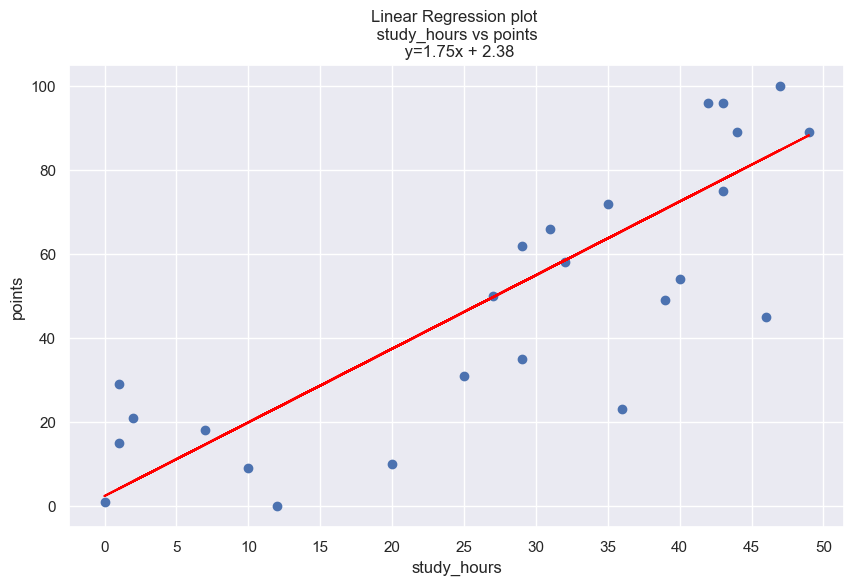

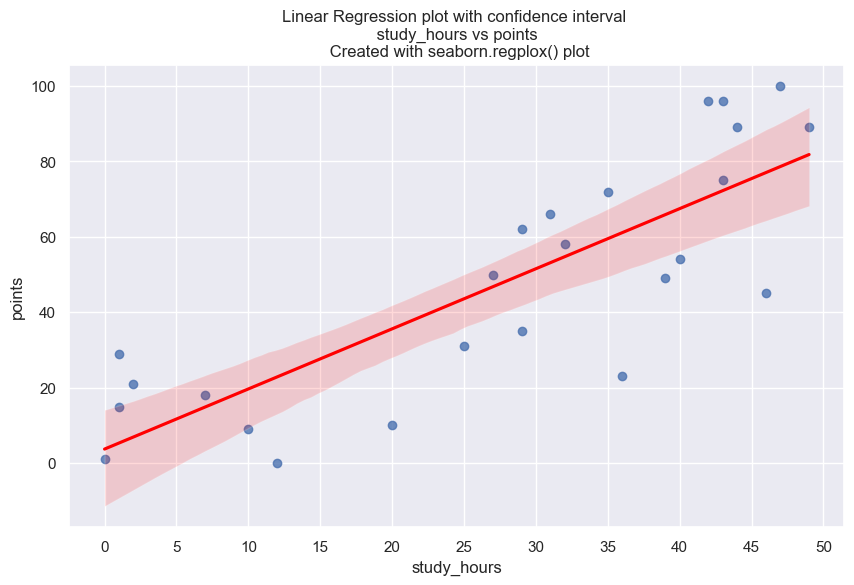

In [21]:
make_regression(indep_var=["x1"],
                dep_var="points",
                df=df,
                train_size=.5)

## 2D

In [22]:
make_regression(indep_var=["x1", "x2"],
                dep_var="points",
                df=df,
                train_size=.5)

Linear Reggresion (n=25, 2D=[['x1', 'x2'] vs points], train_size=0.5)
--------------------------------------------------
Reggresion Model: 
y = 1.769*x1 + -2.707*x2 + 16.124
--------------------------------------------------


,y_pred,y_test
0,67.923915,54.0
1,53.773999,58.0
2,56.589089,35.0
3,54.928336,31.0
4,4.357278,15.0
5,23.813413,0.0
6,80.305092,100.0
7,60.740970,49.0
8,17.676818,18.0
9,-6.471134,29.0


--------------------------------------------------
R^2 coefficient: 0.47396211241813746
--------------------------------------------------
Mean Squared Error: 398.69936698438323
Mean Absolute Error: 16.265003177943413


## 3D

In [23]:
make_regression(indep_var=["x1", "x2", "x3"],
                dep_var="points",
                df=df,
                train_size=.5)

Linear Reggresion (n=25, 3D=[['x1', 'x2', 'x3'] vs points], train_size=0.5)
--------------------------------------------------
Reggresion Model: 
y = 1.862*x1 + -2.62*x2 + 1.656*x3 + 9.578
--------------------------------------------------


,y_pred,y_test
0,73.719891,54.0
1,58.293323,58.0
2,58.118874,35.0
3,56.328472,31.0
4,4.725655,15.0
5,22.354092,0.0
6,83.573544,100.0
7,61.510074,49.0
8,20.016587,18.0
9,-11.951779,29.0


--------------------------------------------------
R^2 coefficient: 0.4281299729466721
--------------------------------------------------
Mean Squared Error: 433.4368743506554
Mean Absolute Error: 16.390202079402016


# __New prediction for the observation `N=[20, 8, 2]`__

In [24]:
models_new_predic_dict = {
    model_name: model.predict(np.array([[20]]))
                              if model_name.split(',')[1].strip().startswith('1') else
                              model.predict(np.array([[20, 8]]))
                              if model_name.split(',')[1].strip().startswith('2') else
                              model.predict(np.array([[20, 8, 2]]))
                for model_name, model in models
}

In [25]:
print(f"{'New prediction for observation N=[20, 8, 2]': ^100}\n")
for i, (model_name, prediction) in enumerate(models_new_predic_dict.items()):
    print(f"{str(i+1) + '.': <3} {model_name: <80} --> {prediction}")

                            New prediction for observation N=[20, 8, 2]                             

1.  Linear Reggresion (n=25, 1D=[['x1'] vs points], train_size=0.8)                  --> [[36.44936041]]
2.  Linear Reggresion (n=25, 2D=[['x1', 'x2'] vs points], train_size=0.8)            --> [[33.03629267]]
3.  Linear Reggresion (n=25, 3D=[['x1', 'x2', 'x3'] vs points], train_size=0.8)      --> [[33.27324686]]
4.  Linear Reggresion (n=1000, 1D=[['x1'] vs points], train_size=0.8)                --> [[42.39264316]]
5.  Linear Reggresion (n=1000, 2D=[['x1', 'x2'] vs points], train_size=0.8)          --> [[44.62513831]]
6.  Linear Reggresion (n=1000, 3D=[['x1', 'x2', 'x3'] vs points], train_size=0.8)    --> [[44.50271466]]
7.  Linear Reggresion (n=25, 1D=[['x1'] vs points], train_size=0.9)                  --> [[36.54145309]]
8.  Linear Reggresion (n=25, 2D=[['x1', 'x2'] vs points], train_size=0.9)            --> [[35.10299329]]
9.  Linear Reggresion (n=25, 3D=[['x1', 'x2', 'x3'] vs poi

Osobiście wierzę najbardziej modelowi `5. Linear Reggresion (n=1000, 2D=[['x1', 'x2'] vs points], train_size=0.8)`, więc dałbym delikwentowi `45` punktów, niestety chyba musi liczy na drugi termin... :)

# __Which paramteres make us pass the exam?__

In [40]:
interesting_models = [(model_name, model) for model_name, model in models
                      if model_name.split(' ')[2] == "(n=1000,"]
interesting_models

[("Linear Reggresion (n=1000, 1D=[['x1'] vs points], train_size=0.8)",
  LinearRegression()),
 ("Linear Reggresion (n=1000, 2D=[['x1', 'x2'] vs points], train_size=0.8)",
  LinearRegression()),
 ("Linear Reggresion (n=1000, 3D=[['x1', 'x2', 'x3'] vs points], train_size=0.8)",
  LinearRegression())]

## 1D

In [41]:
coefs = interesting_models[0][1].coef_[0]
intercept = interesting_models[0][1].intercept_[0]
is_intercept_positive = intercept>=0
symbols = ['-',  '+']
polynomial = ' + '.join([f"{round(coefs[i], 3)}*x{i+1}" for i in range(len(coefs))])
print(f"Reggresion Model: \n{interesting_models[0][0]}\ny = {polynomial} {symbols[int(is_intercept_positive)]} {abs(round(intercept, 3))}")

Reggresion Model: 
Linear Reggresion (n=1000, 1D=[['x1'] vs points], train_size=0.8)
y = 1.003*x1 + 22.339



$$

1.003x_1 + 22.339 > 50  \\
1.003x_1 > 27.661  \\
x1 > 27.653 \\~\\

\hat{y}_{x_1} > 50 \iff x1 > 27.653
$$

## 2D

In [42]:
coefs = interesting_models[1][1].coef_[0]
intercept = interesting_models[1][1].intercept_[0]
is_intercept_positive = intercept>=0
symbols = ['-',  '+']
polynomial = ' + '.join([f"{round(coefs[i], 3)}*x{i+1}" for i in range(len(coefs))])
print(f"Reggresion Model: \n{interesting_models[1][0]}\ny = {polynomial} {symbols[int(is_intercept_positive)]} {abs(round(intercept, 3))}")

Reggresion Model: 
Linear Reggresion (n=1000, 2D=[['x1', 'x2'] vs points], train_size=0.8)
y = 0.998*x1 + 1.47*x2 + 12.912


$$
\hat{y}_{x_1, x_2} > 50 \\
0.998x_1 + 1.47x_2 + 12.912 > 50 \\
0.998x_1 + 1.47x_2  > 37.087 \\~\\

x_1: \\
0.998x_1 > 37.087 - 1.47x_2 \\
x_1 > 37.161 -  1.473x_2 \\~\\

x_2: \\
1.47x_2 > 37.087 - 0.998x_1 \\
x_2 > 25.229 - 0.679x_1 \\~\\

\hat{y}_{x_1, x_2} > 50 \iff
\begin{cases}
    x_1 > 37.161 -  1.473x_2 \\
    x_2 > 25.229 - 0.679x_1
\end{cases}

$$

## 3D

In [43]:
coefs = interesting_models[2][1].coef_[0]
intercept = interesting_models[2][1].intercept_[0]
is_intercept_positive = intercept>=0
symbols = ['-',  '+']
polynomial = ' + '.join([f"{round(coefs[i], 3)}*x{i+1}" for i in range(len(coefs))])
print(f"Reggresion Model: \n{interesting_models[2][0]}\ny = {polynomial} {symbols[int(is_intercept_positive)]} {abs(round(intercept, 3))}")

Reggresion Model: 
Linear Reggresion (n=1000, 3D=[['x1', 'x2', 'x3'] vs points], train_size=0.8)
y = 0.997*x1 + 1.47*x2 + 0.246*x3 + 12.308


$$
    \hat{y}_{x_1, x_2, x_3} > 50 \\
    0.997x_1 + 1.47x_2 + 0.246x_3 + 12.308 > 50 \\ 
    0.997x_1 + 1.47x_2 + 0.246x_3 > 37.692 \\~\\

    x_1:\\
    0.997x_1 > 37.692 - 1.47x_2 - 0.246x_3 \\
    x_1 > 37.805 - 1.474x_2 - 0.247x_3 \\~\\

    x_2:\\
    1.47x_2 > 37.692 - 0.997x_1 - 0.246x_3\\
    x_2 > 25.640 - 0.678x_1 - 0.167x_3 \\~\\

    x_3:\\
    0.246x_3 > 37.692 - 0.997x_1 - 1.47x_2\\
    x_3 > 153.213 - 4.053x_1 - 5.976x_2\\~\\

    \hat{y}_{x_1, x_2, x_3} > 50 \iff
    \begin{cases}
        x_1 > 37.805 - 1.474x_2 - 0.247x_3 \\
        x_2 > 25.640 - 0.678x_1 - 0.167x_3 \\
        x_3 > 153.213 - 4.053x_1 - 5.976x_2
    \end{cases}

$$

Krzysztof Stawarz  
Kraków, 10.11.2023